In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab\ Notebooks/StatisticsWithPython/homework/t_test

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/StatisticsWithPython/homework/t_test


In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
raw_data = pd.read_csv("t_test.csv")

In [4]:
# TODO 01. t_test.csv 파일 내의 처음 10줄의 데이터를 출력하세요.
# TODO 02. t_test.csv 파일 내의 데이터에 대한 통계량을 출력하세요.
# 각 문제에 대한 출력 결과는 아래와 같습니다.

print("head")
print(raw_data.head(n=10))
print()

print("statistical information")
print(raw_data.describe())

head
   pair_data_a  pair_data_b  unpair_data_a  unpair_data_b
0        25.97        68.90          25.97          68.90
1      3135.00      3135.00        3135.00        3135.00
2         9.20        31.60           9.20          31.60
3       264.00       368.00         264.00         368.00
4         3.06        23.40           3.06          23.40
5         3.92        10.40           3.92          10.40
6        10.81        23.03          10.81          23.03
7        10.58        10.58          10.58          10.58
8         3.92         3.92           3.92           3.92
9         3.45         3.91           3.45           3.91

statistical information
        pair_data_a   pair_data_b  unpair_data_a  unpair_data_b
count   1000.000000   1000.000000    1000.000000      500.00000
mean     644.433944    601.340185     644.433944      247.09543
std     2316.357663   2015.048697    2316.357663     1203.14594
min        0.072000      0.130000       0.072000        0.13000
25%        9

In [5]:
# TODO 03-01. 'pair_data_a', 'pair_data_b'의 데이터를 각각 변수에 저장하세요.
# 이때, pandas의 데이터프레임은 그대로 유지합니다.
# TODO 03-02. 각 변수에 저장된 값들의 통계량을 출력하고 앞서 출력한 결과와 맞는지 비교하세요.

pair_data_a: pd.DataFrame = raw_data['pair_data_a']
pair_data_b: pd.DataFrame = raw_data['pair_data_b']

print("statistical information")
print(pair_data_a.describe())
print()
print(pair_data_b.describe())

statistical information
count     1000.000000
mean       644.433944
std       2316.357663
min          0.072000
25%          9.195000
50%         33.440000
75%        204.600000
max      38640.000000
Name: pair_data_a, dtype: float64

count     1000.000000
mean       601.340185
std       2015.048697
min          0.130000
25%          8.445000
50%         24.135000
75%        160.275000
max      16000.000000
Name: pair_data_b, dtype: float64


Text(0, 0.5, 'Value')

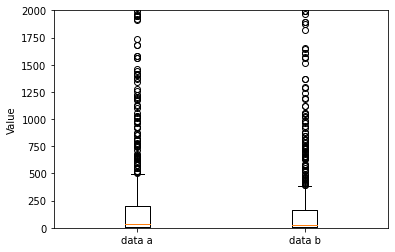

In [6]:
# TODO 04. 'pair_data_a', 'pair_data_b'의 데이터를 이용하여 boxplot을 그려보세요.
# 단, 책에서와 다르게 matplotlib에서 제공하는 boxplot함수를 사용합니다.
# y축의 범위는 0 ~ 2000 사이로 제한하며, x축과 y축에 아래의 그래프와 같이 정보를 표시하세요.

plt.boxplot([pair_data_a, pair_data_b])
plt.ylim(0, 2000)
plt.xticks([1, 2], ['data a', 'data b'])
plt.ylabel('Value')

In [7]:
# TODO 05-01. 'pair_data_a' 데이터의 모평균을 400, 600, 788으로 추정한다고 할때, 단일표본 t검정을 수행하세요.
# TODO 05-02. 각 결과에 대해서 설명하세요.

(h, p) = stats.ttest_1samp(pair_data_a, 400)
print(f"mean: {400:4d}, statistic: {h:.3f}, p-value: {p:.3f}")

(h, p) = stats.ttest_1samp(pair_data_a, 600)
print(f"mean: {600:4d}, statistic: {h:.3f}, p-value: {p:.3f}")

(h, p) = stats.ttest_1samp(pair_data_a, 788)
print(f"mean: {788:4d}, statistic: {h:.3f}, p-value: {p:.3f}")

mean:  400, statistic: 3.337, p-value: 0.001
mean:  600, statistic: 0.607, p-value: 0.544
mean:  788, statistic: -1.960, p-value: 0.050


In [8]:
# TODO 06-01. 'pair_data_a'와 'pair_data_b' 데이터에 대해서 독립표본 t 검정을 수행하세요.
# TODO 06-02. 결과에 대해서 설명하세요.
(h, p) = stats.ttest_ind(pair_data_a, pair_data_b, equal_var=False)
print(f"statistic: {h:.3f}, p-value: {p:.3f}")

statistic: 0.444, p-value: 0.657


In [9]:
# TODO 07-01. 'unpair_data_a'와 'unpair_data_b' 데이터에 대해서 독립표본 t 검정을 수행하세요.
# (힌트: 결과가 nan이 나올 경우, stats의 ttest_ind함수 지원에 대한 문서를 확인해보세요.)
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
# TODO 07-02. 해결 과정에 대해서 서술하세요.
# TODO 07-03. 결과에 대해서 설명하세요.

unpair_data_a: pd.DataFrame = raw_data['unpair_data_a']
unpair_data_b: pd.DataFrame = raw_data['unpair_data_b']

print("statistical information")
print(unpair_data_b.describe())
print()
print(unpair_data_b.describe())

(h, p) = stats.ttest_ind(unpair_data_a, unpair_data_b, equal_var=False, 
                         nan_policy='omit')
print(f"statistic: {h:.3f}, p-value: {p:.3f}")

statistical information
count      500.00000
mean       247.09543
std       1203.14594
min          0.13000
25%          5.72250
50%         16.06000
75%         67.68500
max      14880.00000
Name: unpair_data_b, dtype: float64

count      500.00000
mean       247.09543
std       1203.14594
min          0.13000
25%          5.72250
50%         16.06000
75%         67.68500
max      14880.00000
Name: unpair_data_b, dtype: float64
statistic: 4.372, p-value: 0.000
